In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
from matplotlib import font_manager, rc
font_path = './malgun.ttf' #내가 쓸고 싶은 폰트 파일 경로로 쓰면 됨.
font_name = font_manager.FontProperties(fname=font_path).get_name() #get_name:폰트의 이름을 알려줌.
rc('font', family=font_name)

In [2]:
#브랜드별 언급데이터 불어오기
df0 = pd.read_csv('./crawling/brand_0.csv', index_col=0)
df0['date'] = pd.to_datetime(df0['date']) #날짜형식으로 변경
df0.set_index('date', inplace=True) #날짜를 인덱스로
print(df0.info())
df0 = df0.groupby([df0.index.year, df0.index.month]).count() #년월 기준으로 언급횟수 구하기
df0

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9394 entries, 2020-10-08 to 2020-09-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BHC     9394 non-null   object
dtypes: object(1)
memory usage: 146.8+ KB
None


BHC
date date      
2019 12       2
2020 1      381
     2      507
     3      666
     4      549
     5      458
     6      754
     7     1433
     8     1468
     9     1784
     10    1392

In [3]:
#모든 브랜드별 데이터 불러와서 년월 기준 언급 횟수 이어 붙이기
for i in range(1,15):
    df = pd.read_csv('./crawling/brand_{}.csv'.format(i), index_col=0)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)
    print(df.info())
    df = df.groupby([df.index.year, df.index.month]).count()
    df0= pd.concat([df0,df],axis=1) #df 합치기
df0 = df0.fillna(0) #Nan을 0으로 채우기

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5279 entries, 2020-10-15 to 2020-09-27
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BBQ     5279 non-null   object
dtypes: object(1)
memory usage: 82.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 458 entries, 2020-10-19 to 2020-09-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   네네치킨    458 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1354 entries, 2020-10-19 to 2020-08-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   맘스터치    1354 non-null   object
dtypes: object(1)
memory usage: 21.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1727 entries, 2020-10-19 to 2020-03-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ---

In [4]:
df0

BHC   BBQ   네네치킨   맘스터치    푸라닭   또래오래  신전떡볶이   처갓집    풀무원    애슐리  \
date date                                                                      
2019 12       2     1    0.0    0.0    0.0    0.0    0.0   0.0    0.0    0.0   
2020 1      381    79   23.0    4.0   20.0   12.0   13.0  13.0   13.0    3.0   
     2      507    93   19.0    4.0   35.0   28.0   14.0  20.0   74.0    1.0   
     3      666    60   36.0    2.0   78.0   27.0    4.0   9.0  110.0    0.0   
     4      549    75   33.0   54.0  142.0   25.0   17.0   5.0   75.0    7.0   
     5      458    58   12.0  173.0  100.0   17.0    7.0   6.0   74.0  144.0   
     6      754   169   26.0  156.0  170.0   59.0   56.0  28.0  187.0  222.0   
     7     1433   238   45.0  214.0  320.0   53.0   75.0  61.0   91.0   49.0   
     8     1468  2257   43.0  307.0  360.0   30.0   56.0  64.0   51.0   38.0   
     9     1784  1105  123.0  280.0  292.0  336.0  122.0  73.0   59.0   31.0   
     10    1392  1144   98.0  160.0  210.0  163.0   59.0  26.0  264.0   65.0   

            버거킹    CJ   쿠캣마켓  코스트코  마켓컬리  
date date                                 
2019 12     0.0   0.0    0.0   0.0   0.0  
2020 1      3.0   2.0    0.0   9.0   4.0  
     2      5.0  14.0    0.0  19.0   1.0  
     3     10.0  17.0    0.0  16.0   1.0  
     4      9.0  17.0    2.0   8.0   8.0  
     5     11.0  10.0    0.0  10.0   1.0  
     6     17.0  15.0    0.0  14.0   0.0  
     7     26.0  12.0  149.0  24.0  11.0  
     8     34.0  24.0   83.0  13.0  10.0  
     9     23.0  16.0   84.0  30.0  11.0  
     10    41.0  14.0    7.0  16.0   6.0

In [5]:
df0.to_csv('./commenttrend.csv')

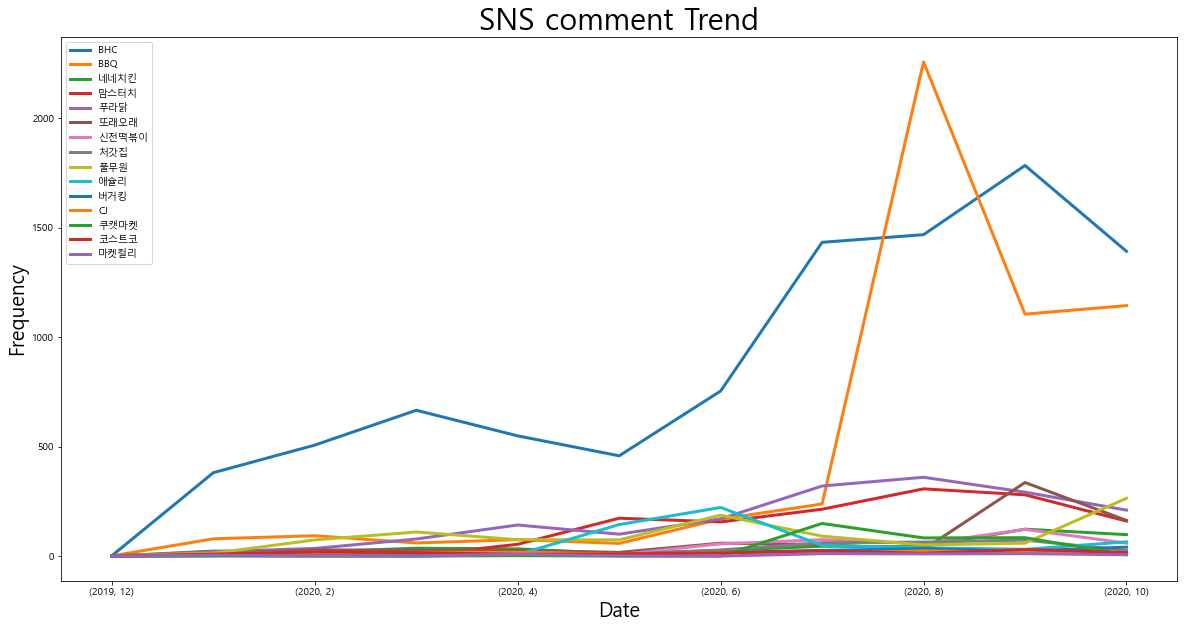

In [6]:
#plt.style.use('ggplot')
#df0.plot(kind='area', stacked=False, alpha=0.5, figsize=(20, 10))
df0.plot(linewidth=3, figsize=(20, 10))
plt.title('SNS comment Trend', size=30)
plt.ylabel('Frequency', size=20)
plt.xlabel('Date', size=20)
plt.show()

In [7]:
# ‘line’ : line plot (default)
# ‘bar’ : vertical bar plot
# ‘barh’ : horizontal bar plot
# ‘hist’ : histogram
# ‘box’ : boxplot
# ‘kde’ : Kernel Density Estimation plot
# ‘density’ : same as ‘kde’
# ‘area’ : area plot
# ‘pie’ : pie plot
# ‘scatter’ : scatter plot
# ‘hexbin’ : hexbin plot